In [3]:
from scipy import optimize
import scipy.stats as st
import numpy as np
import pandas as pd
import math
import sys
import matplotlib.pyplot as plt
import scipy.io
from sklearn.linear_model import LinearRegression
import os.path
from os import path
import netCDF4
from statsmodels.tsa.stattools import acf
import netCDF4 as nc
import warnings
warnings.filterwarnings("ignore")
from scipy import optimize
import scipy.stats as st
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import sys
import seaborn as sns
from scipy import stats

txtfile = '/homes/hhsu/02.InfoTheo/FluxNet/FluxNet_site_info.txt'
id = []     # The number of the site
name = []   # The name of the site
lat = []    # latitude of the site
lon = []    # lontitude of the site
lct = []    # IGBP classification of the site
gns = []    # Vegetation cover level of the site
pool = []   # to mark if the site is taken by a previous detected pair: >0: available   /   0: already taken
elv = []    # elevation of the site
exis = []   # to mark if the site is included in FLUXNET2015 with CC by 4.9
smdata=[]




pair_list=np.array([np.full((150,2),-999)]) # recording the pair by id
diag_distance=np.array([np.full((150,2),-999)]) # Calculating the distance between all site and a given site (as the reference) for making further site spatial visualization 
newid=np.array([np.full((150,2),-999)])   # Give the pair_list a id to make further site spatial visualization 
lonnew=np.array([np.full((150,2),-999)])  # latitude of the site of sites in pair_list
latnew=np.array([np.full((150,2),-999)])  # latitude of the site of sites in pair_list
with open(txtfile) as f:
    for line in f.readlines():
        s = line.split('\t')
        id.append((s[0]))
        name.append((s[1]))
        lat.append(float(s[2])+90)
        lon.append(float(s[3])+180)
        lct.append((s[4]))
        gns.append(int(s[5]))
        pool.append(int(s[0]))
        elv.append(float(s[6]))
        exis.append(int(s[7]))


import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import matplotlib.colors
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xr


from random import randint
colors = []

for i in range(30):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
    
NUM_COLORS = 20
sns.reset_orig()  # get default matplotlib styles back
clrs = sns.color_palette('tab20', n_colors=NUM_COLORS)  # a list of RGB tuples
clrs


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

(-45.0, 70.0)

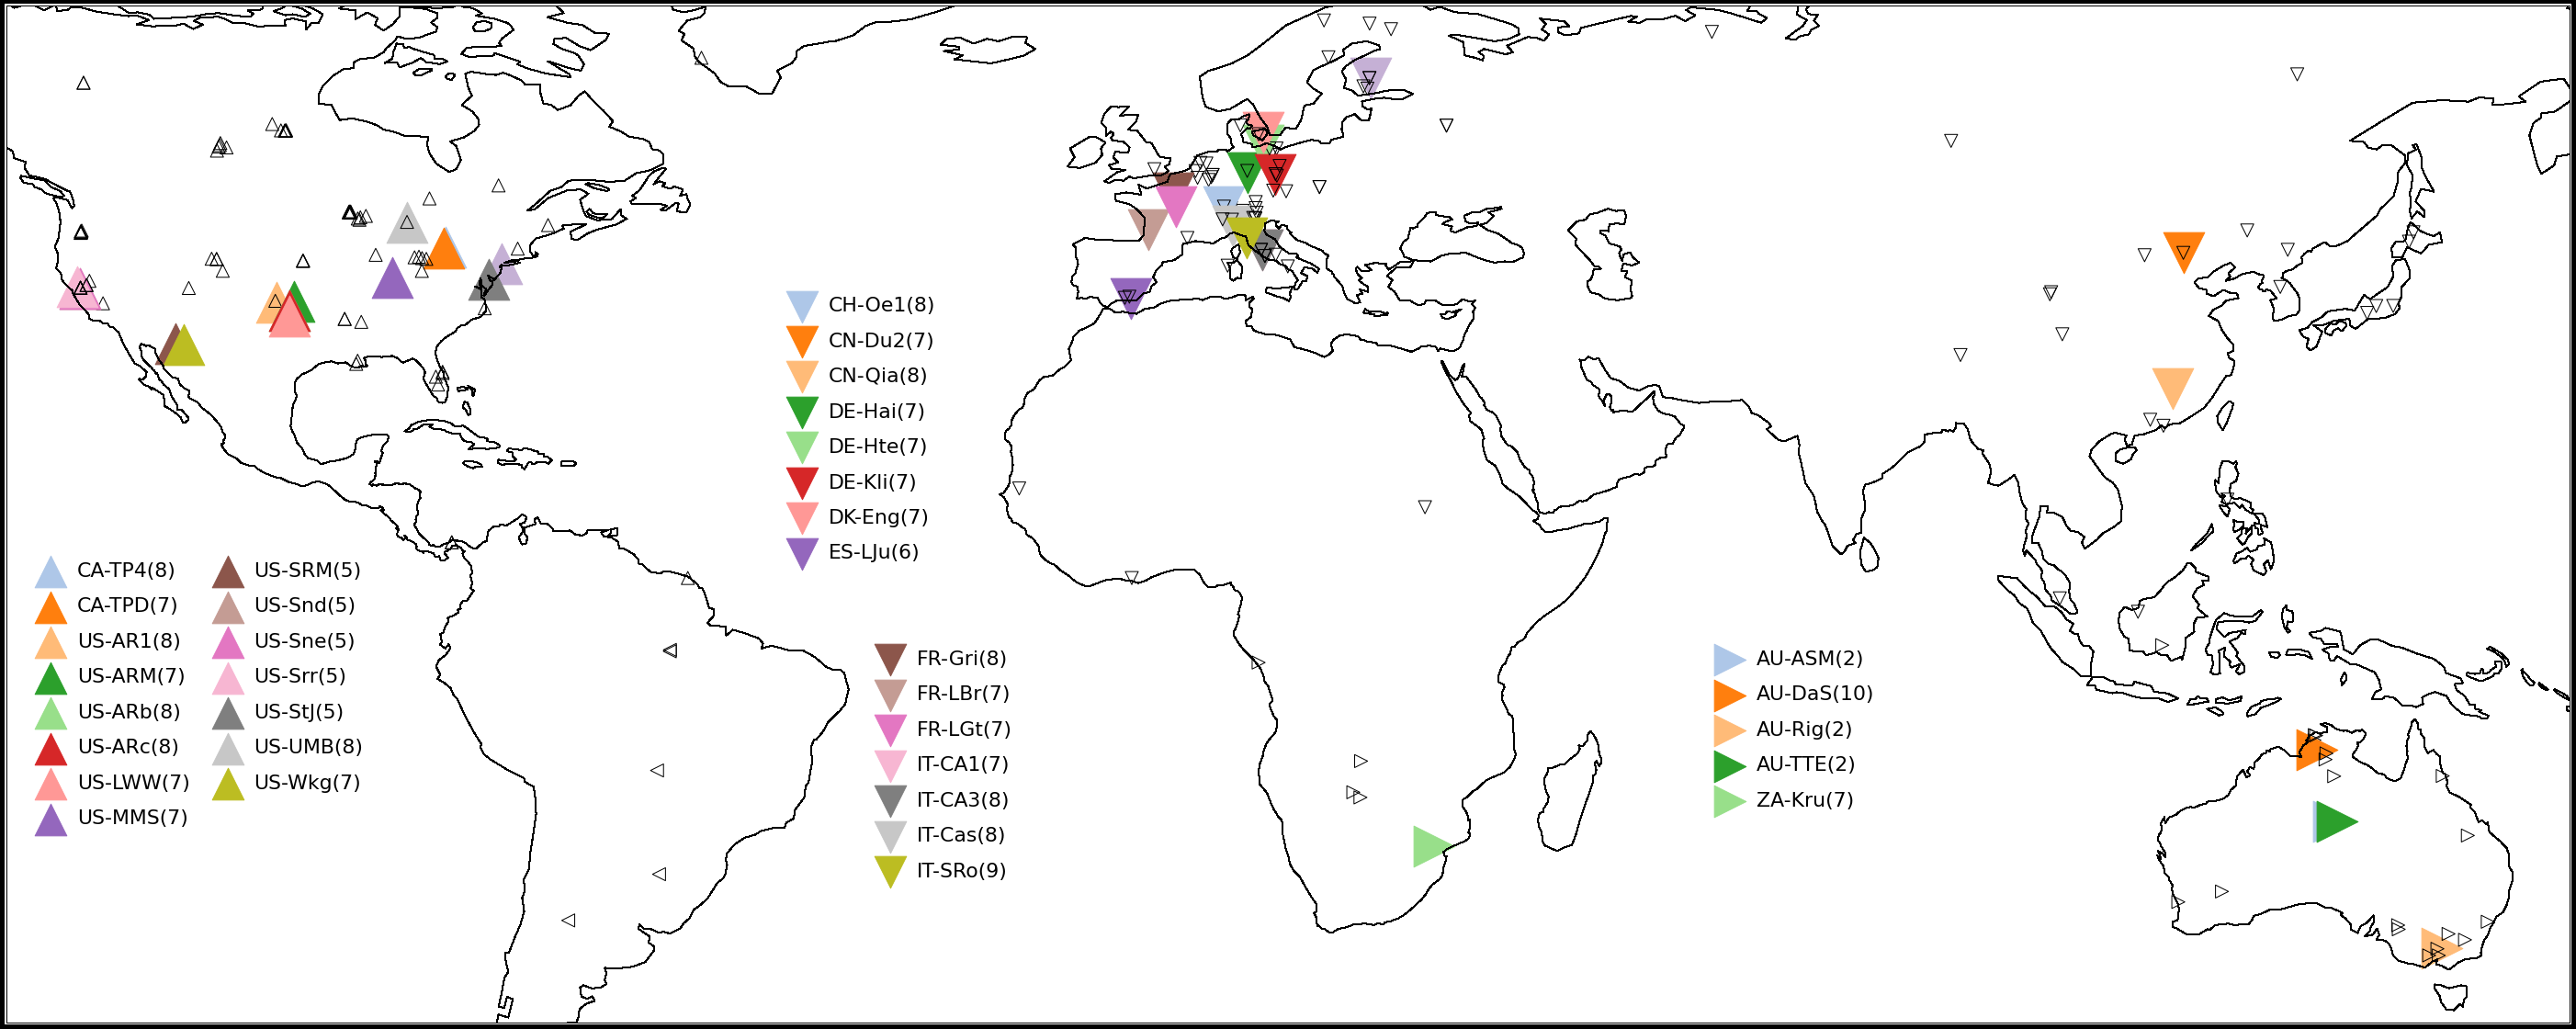

In [4]:
### from matplotlib.patches import Rectangle
fig = plt.figure(figsize=(50,36), edgecolor='black', linewidth=10)
path='/homes/hhsu/02.InfoTheo/CMIP6_RegimeShift/Analysis/'
fname='Mode_Candidate_rv2.nc'  #use for the coastline
ds=xr.open_dataset(path+fname) 
ax=plt.axes(projection=ccrs.PlateCarree())
count=0
count1=0
count2=0
count3=0
tsda=np.load('/homes/hhsu/02.InfoTheo/FluxNet/bl_sm_tsmax.npy')
ssmbk=tsda[7,0,:,:]
sRdry=tsda[0,0,:,:]
sRwet=tsda[1,0,:,:] 
sSlopeSig=tsda[2,0,:,:] 
sTbk=tsda[3,0,:,:] 
sSMbk=tsda[4,0,:] 
sSlopedry=tsda[5,0,:,:] 
sSlopewet=tsda[6,0,:,:] 
umonth=tsda[8,0,:,:] 
snsize=tsda[9,0,:,:] 

tada=np.load('/homes/hhsu/02.InfoTheo/FluxNet/bl_sm_tamax.npy')
asmbk=tada[7,0,:,:]
aRdry=tada[0,0,:,:]
aRwet=tada[1,0,:,:] 
aSlopeSig=tada[2,0,:,:] 
aTbk=tada[3,0,:,:] 
aSMbk=tada[4,0,:] 
aSlopedry=tada[5,0,:,:] 
aSlopewet=tada[6,0,:,:] 
ansize=tada[9,0,:,:] 


hda=np.load('/homes/hhsu/02.InfoTheo/FluxNet/bl_sm_h.npy')
csmbk=hda[7,0,:,:]
cRdry=hda[0,0,:,:]
cRwet=hda[1,0,:,:] 
cSlopeSig=hda[2,0,:,:] 
cTbk=hda[3,0,:,:] 
cSMbk=hda[4,0,:] 
cSlopedry=hda[5,0,:,:] 
cSlopewet=hda[6,0,:,:] 
cnsize=hda[9,0,:,:] 

cup=0
cdown=0
cleft=0
cright=0

for i in range(0 ,int(np.size(lat))): 
    adiag1=100
    adiag2=100
    adiag3=100
    if (aSlopedry[0,i]<0) and  (aSlopewet[0,i]<0) and ((aSlopedry[0,i]-aSlopewet[0,i])<0) and (aSlopeSig[0,i]>-1) and (aSlopeSig[0,i]<0.05):
        adiag1=aSlopeSig[0,i]
    if (aSlopedry[1,i]<0) and  (aSlopewet[1,i]<0) and ((aSlopedry[1,i]-aSlopewet[1,i])<0) and (aSlopeSig[1,i]>-1) and (aSlopeSig[1,i]<0.05):
        adiag2=aSlopeSig[1,i]        
    if (aSlopedry[2,i]<0) and  (aSlopewet[2,i]<0) and ((aSlopedry[2,i]-aSlopewet[2,i])<0) and (aSlopeSig[2,i]>-1) and (aSlopeSig[2,i]<0.05):
        adiag3=aSlopeSig[2,i]
        
    sdiag1=100
    sdiag2=100
    sdiag3=100
    if (sSlopedry[0,i]<0) and  (sSlopewet[0,i]<0) and ((sSlopedry[0,i]-sSlopewet[0,i])<0) and (sSlopeSig[0,i]>-1) and (sSlopeSig[0,i]<0.05):
        sdiag1=sSlopeSig[0,i]
    if (sSlopedry[1,i]<0) and  (sSlopewet[1,i]<0) and ((sSlopedry[1,i]-sSlopewet[1,i])<0) and (sSlopeSig[1,i]>-1) and (sSlopeSig[1,i]<0.05):
        sdiag2=sSlopeSig[1,i]        
    if (sSlopedry[2,i]<0) and  (sSlopewet[2,i]<0) and ((sSlopedry[2,i]-sSlopewet[2,i])<0) and (sSlopeSig[2,i]>-1) and (sSlopeSig[2,i]<0.05):
        sdiag3=sSlopeSig[2,i]        

    cdiag1=100
    cdiag2=100
    cdiag3=100
    if (cSlopedry[0,i]<0) and  (cSlopewet[0,i]<0) and ((cSlopedry[0,i]-cSlopewet[0,i])<0) and (cSlopeSig[0,i]>-1) and (cSlopeSig[0,i]<0.05):
        cdiag1=cSlopeSig[0,i]
    if (cSlopedry[1,i]<0) and  (cSlopewet[1,i]<0) and ((cSlopedry[1,i]-cSlopewet[1,i])<0) and (cSlopeSig[1,i]>-1) and (cSlopeSig[1,i]<0.05):
        cdiag2=cSlopeSig[1,i]        
    if (cSlopedry[2,i]<0) and  (cSlopewet[2,i]<0) and ((cSlopedry[2,i]-cSlopewet[2,i])<0) and (cSlopeSig[2,i]>-1) and (cSlopeSig[2,i]<0.05):
        cdiag3=cSlopeSig[2,i]             
#    plt.scatter(np.asarray(lon[i]-180),np.asarray(lat[i]-90),facecolors='none', edgecolors='k',s=500)


    ax.coastlines()
    ax.set_xticks(np.arange(-150,151,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)

    ax.set_yticks(np.arange(-60,60,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)

    if (lon[i]<160) and (lat[i]>90):
        mk='^'
       
    if (lon[i]>160) and (lat[i]>90):
        mk='v'
     
    if (lon[i]<160) and (lat[i]<90):
        mk='<'
   
    if (lon[i]>160) and (lat[i]<90):
        mk='>'
     
    plt.xlim(-130,160)
    plt.ylim(-70,90)           
    
    if ((adiag1<0.05) and (sdiag1<0.05) and (cdiag1<0.05)) or ((adiag2<0.05) and (sdiag2<0.05) and (cdiag2<0.05)) or ((adiag3<0.05) and (sdiag3<0.05) and (cdiag3<0.05)):
        if (lon[i]<160) and (lat[i]>90):
            mk='^'
            cup=cup+1
            colorc=cup
        if (lon[i]>160) and (lat[i]>90):
            mk='v'
            cdown=cdown+1
            colorc=cdown
        if (lon[i]<160) and (lat[i]<90):
            mk='<'
            cleft=cleft+1
            colorc=cleft
        if (lon[i]>160) and (lat[i]<90):
            mk='>'
            cright=cright+1
            colorc=cright
        plt.scatter(np.asarray(lon[i]-180),np.asarray(lat[i]-90),marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=2000)
        count=count+1

        ax.coastlines()
        ax.set_xticks(np.arange(-150,151,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)

        ax.set_yticks(np.arange(-60,60,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        ax.yaxis.set_major_formatter(lat_formatter)


        plt.xlim(-130,160)
        plt.ylim(-70,90)   
        
        
    elif (sdiag1<0.05) or (sdiag2<0.05)  or (sdiag3<0.05):
        plt.scatter(np.asarray(lon[i]-180),np.asarray(lat[i]-90),marker=mk,facecolors='none', edgecolors='k',s=200)
        count1=count1+1

        ax.coastlines()
        ax.set_xticks(np.arange(-150,151,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)

        ax.set_yticks(np.arange(-60,60,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        ax.yaxis.set_major_formatter(lat_formatter)


        plt.xlim(-130,160)
        plt.ylim(-70,90)   
        
    elif (adiag1<0.05) or (adiag2<0.05)  or (adiag3<0.05):
        plt.scatter(np.asarray(lon[i]-180),np.asarray(lat[i]-90),marker=mk, facecolors='none', edgecolors='k',s=200)
        count2=count2+1

        ax.coastlines()
        ax.set_xticks(np.arange(-150,151,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)

        ax.set_yticks(np.arange(-60,60,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        ax.yaxis.set_major_formatter(lat_formatter)


        plt.xlim(-130,160)
        plt.ylim(-70,90)   

    elif ((adiag1>0.05) and (sdiag1>0.05)) or ((adiag2>0.05) and (sdiag2>0.05)) or ((adiag3>0.05) and (sdiag3>0.05)):
        plt.scatter(np.asarray(lon[i]-180),np.asarray(lat[i]-90),marker=mk,facecolors='none', edgecolors='k',s=200)
        count3=count3+1

        ax.coastlines()
        ax.set_xticks(np.arange(-150,151,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)

        ax.set_yticks(np.arange(-60,60,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        ax.yaxis.set_major_formatter(lat_formatter)


        plt.xlim(-130,160)
        plt.ylim(-40,70)   
        
plt.axis('off')
someX, someY = -130, -40
currentAxis = plt.gca()
#currentAxis.add_patch(Rectangle((someX, someY), 120, 60, edgecolor = 'black', facecolor = 'black', fill=True, lw=5))        
#currentAxis.add_patch(Rectangle((someX+2, someY+2), 120-4, 60-4, edgecolor = 'black', color = 'white', fill=True, lw=5))       
cup=0
cdown=0
cleft=0
cright=0

for i in range(0 ,int(np.size(lat))): 
    adiag1=100
    adiag2=100
    adiag3=100
    if (aSlopedry[0,i]<0) and  (aSlopewet[0,i]<0) and ((aSlopedry[0,i]-aSlopewet[0,i])<0) and (aSlopeSig[0,i]>-1) and (aSlopeSig[0,i]<0.05):
        adiag1=aSlopeSig[0,i]
    if (aSlopedry[1,i]<0) and  (aSlopewet[1,i]<0) and ((aSlopedry[1,i]-aSlopewet[1,i])<0) and (aSlopeSig[1,i]>-1) and (aSlopeSig[1,i]<0.05):
        adiag2=aSlopeSig[1,i]        
    if (aSlopedry[2,i]<0) and  (aSlopewet[2,i]<0) and ((aSlopedry[2,i]-aSlopewet[2,i])<0) and (aSlopeSig[2,i]>-1) and (aSlopeSig[2,i]<0.05):
        adiag3=aSlopeSig[2,i]
        
    sdiag1=100
    sdiag2=100
    sdiag3=100
    if (sSlopedry[0,i]<0) and  (sSlopewet[0,i]<0) and ((sSlopedry[0,i]-sSlopewet[0,i])<0) and (sSlopeSig[0,i]>-1) and (sSlopeSig[0,i]<0.05):
        sdiag1=sSlopeSig[0,i]
    if (sSlopedry[1,i]<0) and  (sSlopewet[1,i]<0) and ((sSlopedry[1,i]-sSlopewet[1,i])<0) and (sSlopeSig[1,i]>-1) and (sSlopeSig[1,i]<0.05):
        sdiag2=sSlopeSig[1,i]        
    if (sSlopedry[2,i]<0) and  (sSlopewet[2,i]<0) and ((sSlopedry[2,i]-sSlopewet[2,i])<0) and (sSlopeSig[2,i]>-1) and (sSlopeSig[2,i]<0.05):
        sdiag3=sSlopeSig[2,i]        

    cdiag1=100
    cdiag2=100
    cdiag3=100
    if (cSlopedry[0,i]<0) and  (cSlopewet[0,i]<0) and ((cSlopedry[0,i]-cSlopewet[0,i])<0) and (cSlopeSig[0,i]>-1) and (cSlopeSig[0,i]<0.05):
        cdiag1=cSlopeSig[0,i]
    if (cSlopedry[1,i]<0) and  (cSlopewet[1,i]<0) and ((cSlopedry[1,i]-cSlopewet[1,i])<0) and (cSlopeSig[1,i]>-1) and (cSlopeSig[1,i]<0.05):
        cdiag2=cSlopeSig[1,i]        
    if (cSlopedry[2,i]<0) and  (cSlopewet[2,i]<0) and ((cSlopedry[2,i]-cSlopewet[2,i])<0) and (cSlopeSig[2,i]>-1) and (cSlopeSig[2,i]<0.05):
        cdiag3=cSlopeSig[2,i]             
#    plt.scatter(np.asarray(lon[i]-180),np.asarray(lat[i]-90),facecolors='none', edgecolors='k',s=500)
    
    if ((adiag1<0.05) and (sdiag1<0.05) and (cdiag1<0.05)) or ((adiag2<0.05) and (sdiag2<0.05) and (cdiag2<0.05)) or ((adiag3<0.05) and (sdiag3<0.05) and (cdiag3<0.05)):
        
        if ((adiag1<0.05) and (sdiag1<0.05) and (cdiag1<0.05)):
            month=umonth[0,i]
        if ((adiag2<0.05) and (sdiag2<0.05) and (cdiag2<0.05)):
            month=umonth[1,i]
        if ((adiag3<0.05) and (sdiag3<0.05) and (cdiag3<0.05)):
            month=umonth[2,i]    
        if (lon[i]<160) and (lat[i]>90):
            mk='^'
            cup=cup+1
            colorc=cup
            if cup<9:
                plt.scatter(-125,10-cup*4,marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=1200)
                plt.text(-122,9.5-cup*4,name[i]+'('+str(round(month))+')' , fontsize = 22)
            if cup>9:
                plt.scatter(-105,10-(cup-9)*4,marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=1200)
                plt.text(-102,9.5-(cup-9)*4,name[i]+'('+str(round(month))+')' , fontsize = 22)
                
        if (lon[i]>160) and (lat[i]>90):
            mk='v'
            cdown=cdown+1
            colorc=cdown
            if cdown<9:
                plt.scatter(-40,40-cdown*4,marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=1200)
                plt.text(-37,39.5-cdown*4,name[i]+'('+str(round(month))+')' , fontsize = 22)
            if cdown>9:
                plt.scatter(-30,0-(cdown-9)*4,marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=1200)
                plt.text(-27,-0.5-(cdown-9)*4,name[i]+'('+str(round(month))+')' , fontsize = 22)
            
            
        if (lon[i]<160) and (lat[i]<90):
            mk='<'
            cleft=cleft+1
            colorc=cleft
            
            
        if (lon[i]>160) and (lat[i]<90):
            mk='>'
            cright=cright+1
            colorc=cright
     
            plt.scatter(65,0-(cright)*4,marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=1200)
            plt.text(68,-0.5-(cright)*4,name[i]+'('+str(round(month))+')' , fontsize = 22)
 
plt.xlim(-130,160)
plt.ylim(-45,70)   
#plt.savefig('/homes/hhsu/02.InfoTheo/FluxNet/Figure2_Map_Site', format="pdf", bbox_inches="tight")

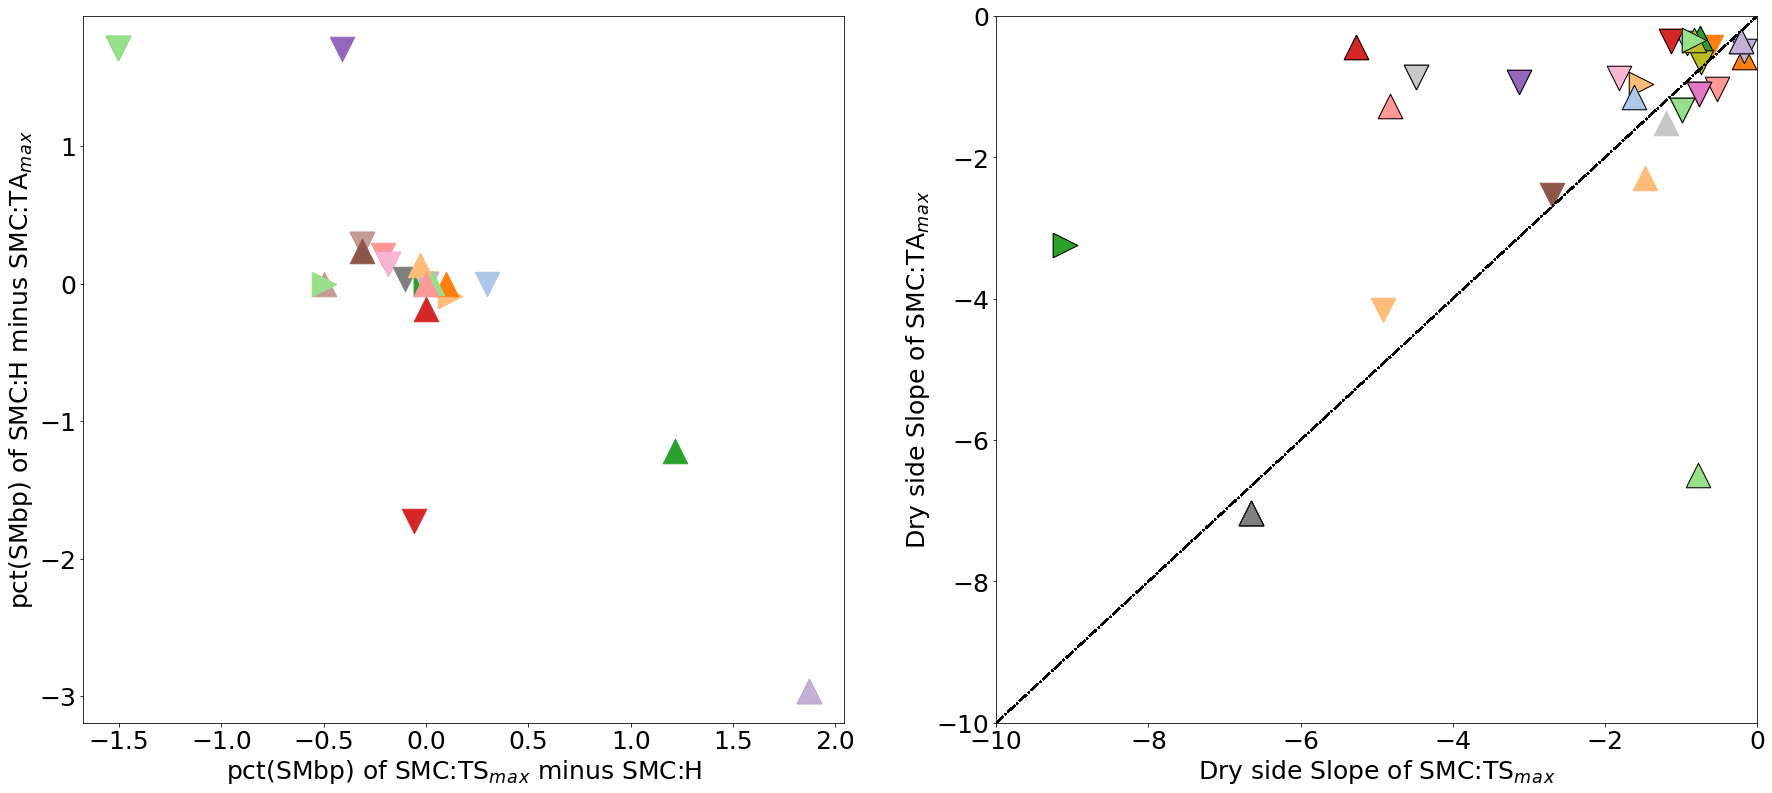

In [7]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from PIL import Image
import cv2
cup=0
cdown=0
cleft=0
cright=0
count=0
pp1=np.zeros(300)
pp2=np.zeros(300)
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(30,13))
tsda=np.load('/homes/hhsu/02.InfoTheo/FluxNet/bl_sm_tsmax.npy')
tau=tsda[12,0,:,:] 
sSEdry=tsda[13,0,:,:] 

tada=np.load('/homes/hhsu/02.InfoTheo/FluxNet/bl_sm_tamax.npy')
aSEdry=tada[13,0,:,:] 

for i in range(0 ,int(np.size(lat))): 
    adiag1=100
    adiag2=100
    adiag3=100
    if (aSlopedry[0,i]<0) and  (aSlopewet[0,i]<0) and ((aSlopedry[0,i]-aSlopewet[0,i])<0) and (aSlopeSig[0,i]>-1) and (aSlopeSig[0,i]<0.05):
        adiag1=aSlopeSig[0,i]
    if (aSlopedry[1,i]<0) and  (aSlopewet[1,i]<0) and ((aSlopedry[1,i]-aSlopewet[1,i])<0) and (aSlopeSig[1,i]>-1) and (aSlopeSig[1,i]<0.05):
        adiag2=aSlopeSig[1,i]        
    if (aSlopedry[2,i]<0) and  (aSlopewet[2,i]<0) and ((aSlopedry[2,i]-aSlopewet[2,i])<0) and (aSlopeSig[2,i]>-1) and (aSlopeSig[2,i]<0.05):
        adiag3=aSlopeSig[2,i]
        
    sdiag1=100
    sdiag2=100
    sdiag3=100
    if (sSlopedry[0,i]<0) and  (sSlopewet[0,i]<0) and ((sSlopedry[0,i]-sSlopewet[0,i])<0) and (sSlopeSig[0,i]>-1) and (sSlopeSig[0,i]<0.05):
        adiag1=sSlopeSig[0,i]
    if (sSlopedry[1,i]<0) and  (sSlopewet[1,i]<0) and ((sSlopedry[1,i]-sSlopewet[1,i])<0) and (sSlopeSig[1,i]>-1) and (sSlopeSig[1,i]<0.05):
        sdiag2=sSlopeSig[1,i]        
    if (sSlopedry[2,i]<0) and  (sSlopewet[2,i]<0) and ((sSlopedry[2,i]-sSlopewet[2,i])<0) and (sSlopeSig[2,i]>-1) and (sSlopeSig[2,i]<0.05):
        sdiag3=sSlopeSig[2,i]        
        
    cdiag1=100
    cdiag2=100
    cdiag3=100
    if (cSlopedry[0,i]<0) and  (cSlopewet[0,i]<0) and ((cSlopedry[0,i]-cSlopewet[0,i])<0) and (cSlopeSig[0,i]>-1) and (cSlopeSig[0,i]<0.05):
        cdiag1=cSlopeSig[0,i]
    if (cSlopedry[1,i]<0) and  (cSlopewet[1,i]<0) and ((cSlopedry[1,i]-cSlopewet[1,i])<0) and (cSlopeSig[1,i]>-1) and (cSlopeSig[1,i]<0.05):
        cdiag2=cSlopeSig[1,i]        
    if (cSlopedry[2,i]<0) and  (cSlopewet[2,i]<0) and ((cSlopedry[2,i]-cSlopewet[2,i])<0) and (cSlopeSig[2,i]>-1) and (cSlopeSig[2,i]<0.05):
        cdiag3=cSlopeSig[2,i]             
        

    if (adiag1<0.05) and (sdiag1<0.05) and (cdiag1<0.05):        
        if (lon[i]<160) and (lat[i]>90):
            mk='^'
            cup=cup+1
            colorc=cup
        if (lon[i]>160) and (lat[i]>90):
            mk='v'
            cdown=cdown+1
            colorc=cdown
        if (lon[i]<160) and (lat[i]<90):
            mk='<'
            cleft=cleft+1
            colorc=cleft
        if (lon[i]>160) and (lat[i]<90):
            mk='>'
            cright=cright+1
            colorc=cright
        axs[0].scatter(ssmbk[0,i]-csmbk[0,i],csmbk[0,i]-asmbk[0,i],marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=600)
        ps=snsize[0,i]*ssmbk[0,i]/100
        pc=cnsize[0,i]*csmbk[0,i]/100
        pa=ansize[0,i]*asmbk[0,i]/100
        dpsc = np.array([[ps, snsize[0,i] - ps], [pc, cnsize[0,i] - pc]])
        pv1=stats.chi2_contingency(dpsc)[1]
        dpsc = np.array([[pa, ansize[0,i] - pa], [pc, cnsize[0,i] - pc]])
        pv2=stats.chi2_contingency(dpsc)[1]
        pp1[count]=pv1
        pp2[count]=pv2
        if pv1<0.05 and pv2<0.05:
            axs[0].scatter(ssmbk[0,i]-csmbk[0,i],csmbk[0,i]-asmbk[1,i],marker='.',facecolors='k', edgecolors='k',s=150)
                
      
    elif (adiag2<0.05) and (sdiag2<0.05) and (cdiag2<0.05):   
        if (lon[i]<160) and (lat[i]>90):
            mk='^'
            cup=cup+1
            colorc=cup
        if (lon[i]>160) and (lat[i]>90):
            mk='v'
            cdown=cdown+1
            colorc=cdown
        if (lon[i]<160) and (lat[i]<90):
            mk='<'
            cleft=cleft+1
            colorc=cleft
        if (lon[i]>160) and (lat[i]<90):
            mk='>'
            cright=cright+1
            colorc=cright        
        axs[0].scatter(ssmbk[1,i]-csmbk[1,i],csmbk[1,i]-asmbk[1,i],marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=600)
        ps=snsize[1,i]*ssmbk[1,i]/100
        pc=cnsize[1,i]*csmbk[1,i]/100
        pa=ansize[1,i]*asmbk[1,i]/100
        dpsc = np.array([[ps, snsize[1,i] - ps], [pc, cnsize[1,i] - pc]])
        pv1=stats.chi2_contingency(dpsc)[1]
        dpsc = np.array([[pa, ansize[1,i] - pa], [pc, cnsize[1,i] - pc]])
        pv2=stats.chi2_contingency(dpsc)[1]
        pp1[count]=pv1
        pp2[count]=pv2
        if pv1<0.05 and pv2<0.05:
            axs[0].scatter(ssmbk[1,i]-csmbk[1,i],csmbk[1,i]-asmbk[1,i],marker='.',facecolors='k', edgecolors='k',s=150)
        
        
    elif (adiag3<0.05) and (sdiag3<0.05) and (cdiag3<0.05):  
        if (lon[i]<160) and (lat[i]>90):
            mk='^'
            cup=cup+1
            colorc=cup
        if (lon[i]>160) and (lat[i]>90):
            mk='v'
            cdown=cdown+1
            colorc=cdown
        if (lon[i]<160) and (lat[i]<90):
            mk='<'
            cleft=cleft+1
            colorc=cleft
        if (lon[i]>160) and (lat[i]<90):
            mk='>'
            cright=cright+1
            colorc=cright        
         
        axs[0].scatter(ssmbk[2,i]-csmbk[2,i],csmbk[2,i]-asmbk[2,i],marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=600)
        ps=snsize[2,i]*ssmbk[2,i]/100
        pc=cnsize[2,i]*csmbk[2,i]/100
        pa=ansize[2,i]*asmbk[2,i]/100
        dpsc = np.array([[ps, snsize[2,i] - ps], [pc, cnsize[2,i] - pc]])
        pv1=stats.chi2_contingency(dpsc)[1]
        dpsc = np.array([[pa, ansize[2,i] - pa], [pc, cnsize[2,i] - pc]])
        pv2=stats.chi2_contingency(dpsc)[1]
        pp1[count]=pv1
        pp2[count]=pv2
        if pv1<0.05 and pv2<0.05:
            axs[0].scatter(ssmbk[2,i]-csmbk[2,i],csmbk[2,i]-asmbk[2,i],marker='.',facecolors='k', edgecolors='k',s=150)
    count=count+1
   
    #plt.xlim(-10,0)
    #plt.ylim(-10,0)       
    #x_values = [-10, 0]
    #y_values = [-10, 0]
    #plt.plot(x_values,y_values,'k-.')
    axs[0].set_xlabel('pct(SMbp) of SMC:TS${_m}$${_a}$${_x}$ minus SMC:H', fontsize=22)
    axs[0].set_ylabel('pct(SMbp) of SMC:H minus SMC:TA${_m}$${_a}$${_x}$', fontsize=22)
    #plt.savefig('/homes/hhsu/02.InfoTheo/FluxNet/Scatter_diag_SM_TAandTSmax')
    

cup=0
cdown=0
cleft=0
cright=0
count=0


for i in range(0 ,int(np.size(lat))): 
    adiag1=100
    adiag2=100
    adiag3=100
    if (aSlopedry[0,i]<0) and  (aSlopewet[0,i]<0) and ((aSlopedry[0,i]-aSlopewet[0,i])<0) and (aSlopeSig[0,i]>-1) and (aSlopeSig[0,i]<0.05):
        adiag1=aSlopeSig[0,i]
    if (aSlopedry[1,i]<0) and  (aSlopewet[1,i]<0) and ((aSlopedry[1,i]-aSlopewet[1,i])<0) and (aSlopeSig[1,i]>-1) and (aSlopeSig[1,i]<0.05):
        adiag2=aSlopeSig[1,i]        
    if (aSlopedry[2,i]<0) and  (aSlopewet[2,i]<0) and ((aSlopedry[2,i]-aSlopewet[2,i])<0) and (aSlopeSig[2,i]>-1) and (aSlopeSig[2,i]<0.05):
        adiag3=aSlopeSig[2,i]
        
    sdiag1=100
    sdiag2=100
    sdiag3=100
    if (sSlopedry[0,i]<0) and  (sSlopewet[0,i]<0) and ((sSlopedry[0,i]-sSlopewet[0,i])<0) and (sSlopeSig[0,i]>-1) and (sSlopeSig[0,i]<0.05):
        sdiag1=sSlopeSig[0,i]
    if (sSlopedry[1,i]<0) and  (sSlopewet[1,i]<0) and ((sSlopedry[1,i]-sSlopewet[1,i])<0) and (sSlopeSig[1,i]>-1) and (sSlopeSig[1,i]<0.05):
        sdiag2=sSlopeSig[1,i]        
    if (sSlopedry[2,i]<0) and  (sSlopewet[2,i]<0) and ((sSlopedry[2,i]-sSlopewet[2,i])<0) and (sSlopeSig[2,i]>-1) and (sSlopeSig[2,i]<0.05):
        sdiag3=sSlopeSig[2,i]        
            
    cdiag1=100
    cdiag2=100
    cdiag3=100
    if (cSlopedry[0,i]<0) and  (cSlopewet[0,i]<0) and ((cSlopedry[0,i]-cSlopewet[0,i])<0) and (cSlopeSig[0,i]>-1) and (cSlopeSig[0,i]<0.05):
        cdiag1=cSlopeSig[0,i]
    if (cSlopedry[1,i]<0) and  (cSlopewet[1,i]<0) and ((cSlopedry[1,i]-cSlopewet[1,i])<0) and (cSlopeSig[1,i]>-1) and (cSlopeSig[1,i]<0.05):
        cdiag2=cSlopeSig[1,i]        
    if (cSlopedry[2,i]<0) and  (cSlopewet[2,i]<0) and ((cSlopedry[2,i]-cSlopewet[2,i])<0) and (cSlopeSig[2,i]>-1) and (cSlopeSig[2,i]<0.05):
        cdiag3=cSlopeSig[2,i]       
        
    if (lon[i]<160) and (lat[i]>90):
        mk='^'
    if (lon[i]>160) and (lat[i]>90):
        mk='v'
    if (lon[i]<160) and (lat[i]<90):
        mk='<'
    if (lon[i]>160) and (lat[i]<90):
        mk='>'
    if (adiag1<0.05) and (sdiag1<0.05) and (cdiag1<0.05):        
        if (lon[i]<160) and (lat[i]>90):
            mk='^'
            cup=cup+1
            colorc=cup
        if (lon[i]>160) and (lat[i]>90):
            mk='v'
            cdown=cdown+1
            colorc=cdown
        if (lon[i]<160) and (lat[i]<90):
            mk='<'
            cleft=cleft+1
            colorc=cleft
        if (lon[i]>160) and (lat[i]<90):
            mk='>'
            cright=cright+1
            colorc=cright                
        axs[1].scatter(sSlopedry[0,i],aSlopedry[0,i],marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=600)
        vest = math.sqrt((tau[0,i]+1)*(sSEdry[0,i]+aSEdry[0,i])) # Adjust DOFs by tau, calculate z & p values for signif slope change
        z = abs(sSlopedry[0,i]-aSlopedry[0,i])/vest
        pval = st.norm.sf(abs(z))   
        if pval<0.01:
            axs[1].scatter(sSlopedry[0,i],aSlopedry[0,i],marker=mk,facecolors=clrs[colorc], edgecolors='k',s=600)

        
    elif (adiag2<0.05) and (sdiag2<0.05) and (cdiag2<0.05):   
        if (lon[i]<160) and (lat[i]>90):
            mk='^'
            cup=cup+1
            colorc=cup
        if (lon[i]>160) and (lat[i]>90):
            mk='v'
            cdown=cdown+1
            colorc=cdown
        if (lon[i]<160) and (lat[i]<90):
            mk='<'
            cleft=cleft+1
            colorc=cleft
        if (lon[i]>160) and (lat[i]<90):
            mk='>'
            cright=cright+1
            colorc=cright        
        axs[1].scatter(sSlopedry[1,i],aSlopedry[1,i],marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=600)
        vest = math.sqrt((tau[1,i]+1)*(sSEdry[1,i]+aSEdry[1,i])) # Adjust DOFs by tau, calculate z & p values for signif slope change
        z = abs(sSlopedry[1,i]-aSlopedry[1,i])/vest
        pval = st.norm.sf(abs(z))   
        if pval<0.01:
            axs[1].scatter(sSlopedry[1,i],aSlopedry[1,i],marker=mk,facecolors=clrs[colorc], edgecolors='k',s=600)
        
    elif (adiag3<0.05) and (sdiag3<0.05) and (cdiag3<0.05):  
        if (lon[i]<160) and (lat[i]>90):
            mk='^'
            cup=cup+1
            colorc=cup
        if (lon[i]>160) and (lat[i]>90):
            mk='v'
            cdown=cdown+1
            colorc=cdown
        if (lon[i]<160) and (lat[i]<90):
            mk='<'
            cleft=cleft+1
            colorc=cleft
        if (lon[i]>160) and (lat[i]<90):
            mk='>'
            cright=cright+1
            colorc=cright        
        axs[1].scatter(sSlopedry[2,i],aSlopedry[2,i],marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=600)
        vest = math.sqrt((tau[2,i]+1)*(sSEdry[2,i]+aSEdry[2,i])) # Adjust DOFs by tau, calculate z & p values for signif slope change
        z = abs(sSlopedry[2,i]-aSlopedry[2,i])/vest
        pval = st.norm.sf(abs(z))   
        if pval<0.01:
            axs[1].scatter(sSlopedry[2,i],aSlopedry[2,i],marker=mk,facecolors=clrs[colorc], edgecolors='k',s=600)

        
    axs[1].set_xlim(-10,0)
    axs[1].set_ylim(-10,0)       
    x_values = [-10, 0]
    y_values = [-10, 0]
    axs[1].plot(x_values,y_values,'k-.')
    axs[1].set_xlabel('Dry side Slope of SMC:TS${_m}$${_a}$${_x}$', fontsize=18)
    axs[1].set_ylabel('Dry side Slope of SMC:TA${_m}$${_a}$${_x}$', fontsize=18)
 #   plt.savefig('/homes/hhsu/02.InfoTheo/FluxNet/Scatter_diag_SM_TAandTSmax')    
    

        
    for ns in range(0,2):
        for item in ([axs[ns].title, axs[ns].xaxis.label, axs[ns].yaxis.label] +
                            axs[ns].get_xticklabels() + axs[ns].get_yticklabels()):
                            item.set_fontsize(25)
#im = plt.imread("/homes/hhsu/02.InfoTheo/FluxNet/Figure3_pvalue.png")
#im = cv2.flip(im, 0)
#im = axs[0].imshow(im, extent=[0.5, 1.9, 0.5, 1.9])
#axs[0].set_xlim(-2,2)
#axs[0].set_ylim(-3,2)  
plt.savefig('/homes/hhsu/02.InfoTheo/FluxNet/Figure3_BKpct_Slope', format="pdf", bbox_inches="tight")

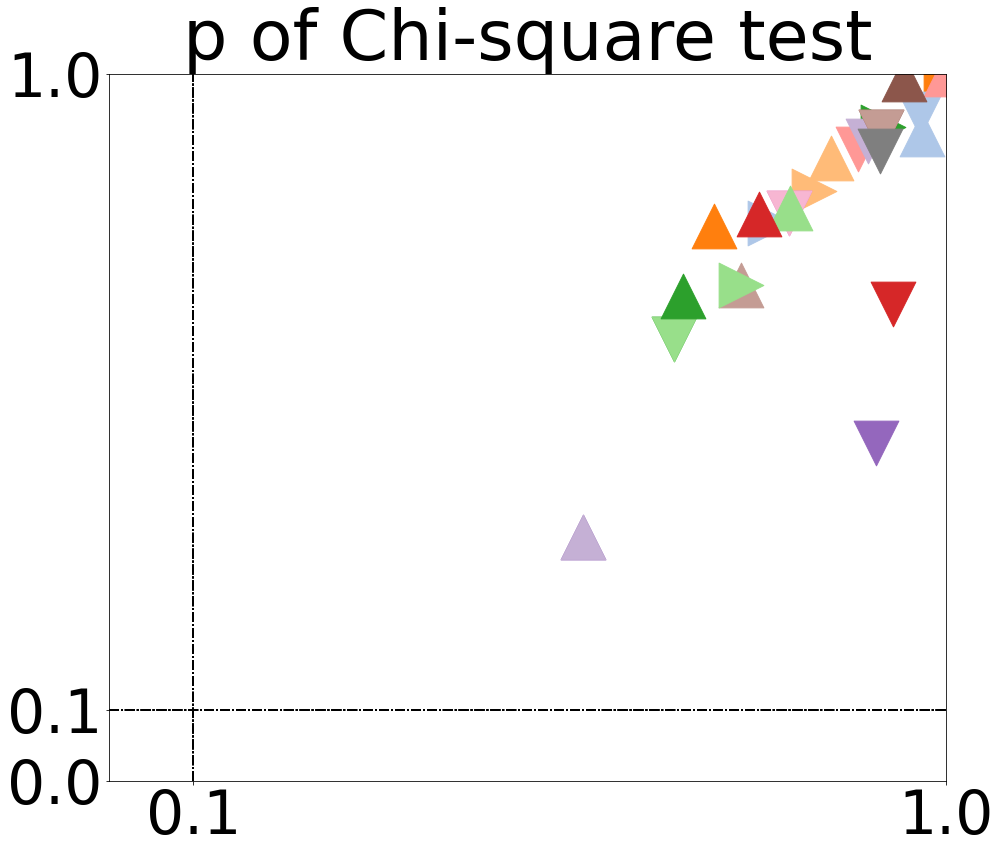

In [6]:
cup=0
cdown=0
cleft=0
cright=0
count=0
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(15,13))

for i in range(0 ,int(np.size(lat))): 
    adiag1=100
    adiag2=100
    adiag3=100
    if (aSlopedry[0,i]<0) and  (aSlopewet[0,i]<0) and ((aSlopedry[0,i]-aSlopewet[0,i])<0) and (aSlopeSig[0,i]>-1) and (aSlopeSig[0,i]<0.05):
        adiag1=aSlopeSig[0,i]
    if (aSlopedry[1,i]<0) and  (aSlopewet[1,i]<0) and ((aSlopedry[1,i]-aSlopewet[1,i])<0) and (aSlopeSig[1,i]>-1) and (aSlopeSig[1,i]<0.05):
        adiag2=aSlopeSig[1,i]        
    if (aSlopedry[2,i]<0) and  (aSlopewet[2,i]<0) and ((aSlopedry[2,i]-aSlopewet[2,i])<0) and (aSlopeSig[2,i]>-1) and (aSlopeSig[2,i]<0.05):
        adiag3=aSlopeSig[2,i]
        
    sdiag1=100
    sdiag2=100
    sdiag3=100
    if (sSlopedry[0,i]<0) and  (sSlopewet[0,i]<0) and ((sSlopedry[0,i]-sSlopewet[0,i])<0) and (sSlopeSig[0,i]>-1) and (sSlopeSig[0,i]<0.05):
        adiag1=sSlopeSig[0,i]
    if (sSlopedry[1,i]<0) and  (sSlopewet[1,i]<0) and ((sSlopedry[1,i]-sSlopewet[1,i])<0) and (sSlopeSig[1,i]>-1) and (sSlopeSig[1,i]<0.05):
        sdiag2=sSlopeSig[1,i]        
    if (sSlopedry[2,i]<0) and  (sSlopewet[2,i]<0) and ((sSlopedry[2,i]-sSlopewet[2,i])<0) and (sSlopeSig[2,i]>-1) and (sSlopeSig[2,i]<0.05):
        sdiag3=sSlopeSig[2,i]        
        
    cdiag1=100
    cdiag2=100
    cdiag3=100
    if (cSlopedry[0,i]<0) and  (cSlopewet[0,i]<0) and ((cSlopedry[0,i]-cSlopewet[0,i])<0) and (cSlopeSig[0,i]>-1) and (cSlopeSig[0,i]<0.05):
        cdiag1=cSlopeSig[0,i]
    if (cSlopedry[1,i]<0) and  (cSlopewet[1,i]<0) and ((cSlopedry[1,i]-cSlopewet[1,i])<0) and (cSlopeSig[1,i]>-1) and (cSlopeSig[1,i]<0.05):
        cdiag2=cSlopeSig[1,i]        
    if (cSlopedry[2,i]<0) and  (cSlopewet[2,i]<0) and ((cSlopedry[2,i]-cSlopewet[2,i])<0) and (cSlopeSig[2,i]>-1) and (cSlopeSig[2,i]<0.05):
        cdiag3=cSlopeSig[2,i]             
        

    if (adiag1<0.05) and (sdiag1<0.05) and (cdiag1<0.05):        
        if (lon[i]<160) and (lat[i]>90):
            mk='^'
            cup=cup+1
            colorc=cup
        if (lon[i]>160) and (lat[i]>90):
            mk='v'
            cdown=cdown+1
            colorc=cdown
        if (lon[i]<160) and (lat[i]<90):
            mk='<'
            cleft=cleft+1
            colorc=cleft
        if (lon[i]>160) and (lat[i]<90):
            mk='>'
            cright=cright+1
            colorc=cright
        plt.scatter(pp1[i],pp2[i],marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=2000)

    elif (adiag2<0.05) and (sdiag2<0.05) and (cdiag2<0.05):   
        if (lon[i]<160) and (lat[i]>90):
            mk='^'
            cup=cup+1
            colorc=cup
        if (lon[i]>160) and (lat[i]>90):
            mk='v'
            cdown=cdown+1
            colorc=cdown
        if (lon[i]<160) and (lat[i]<90):
            mk='<'
            cleft=cleft+1
            colorc=cleft
        if (lon[i]>160) and (lat[i]<90):
            mk='>'
            cright=cright+1
            colorc=cright    
        plt.scatter(pp1[i],pp2[i],marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=2000)


    elif (adiag3<0.05) and (sdiag3<0.05) and (cdiag3<0.05):  
        if (lon[i]<160) and (lat[i]>90):
            mk='^'
            cup=cup+1
            colorc=cup
        if (lon[i]>160) and (lat[i]>90):
            mk='v'
            cdown=cdown+1
            colorc=cdown
        if (lon[i]<160) and (lat[i]<90):
            mk='<'
            cleft=cleft+1
            colorc=cleft
        if (lon[i]>160) and (lat[i]<90):
            mk='>'
            cright=cright+1
            colorc=cright        
         
        plt.scatter(pp1[i],pp2[i],marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=2000)
        plt.xlim(0,1)
        plt.ylim(0,1)       
        x_values = [0.0, 1]
        y_values = [0.1, 0.1]
        plt.plot(x_values,y_values,'k-.')
        x_values = [0.1, 0.1]
        y_values = [0, 1]
        plt.plot(x_values,y_values,'k-.')
        #axs[0].set_xlabel('Dry side Slope of SMC:TSmax', fontsize=18)
        #axs[0].set_ylabel('Dry side Slope of SMC:TAmax', fontsize=18)
        plt.tick_params(axis='y', labelcolor='black', labelsize=60)
        plt.tick_params(axis='x', labelcolor='black', labelsize=60)
        plt.xticks([0.1,1])
        plt.yticks([0,0.1,1])

        plt.title('p of Chi-square test',size=70)
        plt.savefig('/homes/hhsu/02.InfoTheo/FluxNet/Figure3_pvalue', format="pdf", bbox_inches="tight")

In [43]:
tsda=np.load('/homes/hhsu/02.InfoTheo/FluxNet/bl_sm_tsmax.npy')
tau=tsda[12,0,:,:] 
sSEdry=tsda[13,0,:,:] 

tada=np.load('/homes/hhsu/02.InfoTheo/FluxNet/bl_sm_tamax.npy')
aSEdry=tada[13,0,:,:] 

cup=0
cdown=0
cleft=0
cright=0
count=0
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(15,13))

for i in range(0 ,int(np.size(lat))): 
    adiag1=100
    adiag2=100
    adiag3=100
    if (aSlopedry[0,i]<0) and  (aSlopewet[0,i]<0) and ((aSlopedry[0,i]-aSlopewet[0,i])<0) and (aSlopeSig[0,i]>-1) and (aSlopeSig[0,i]<0.05):
        adiag1=aSlopeSig[0,i]
    if (aSlopedry[1,i]<0) and  (aSlopewet[1,i]<0) and ((aSlopedry[1,i]-aSlopewet[1,i])<0) and (aSlopeSig[1,i]>-1) and (aSlopeSig[1,i]<0.05):
        adiag2=aSlopeSig[1,i]        
    if (aSlopedry[2,i]<0) and  (aSlopewet[2,i]<0) and ((aSlopedry[2,i]-aSlopewet[2,i])<0) and (aSlopeSig[2,i]>-1) and (aSlopeSig[2,i]<0.05):
        adiag3=aSlopeSig[2,i]
        
    sdiag1=100
    sdiag2=100
    sdiag3=100
    if (sSlopedry[0,i]<0) and  (sSlopewet[0,i]<0) and ((sSlopedry[0,i]-sSlopewet[0,i])<0) and (sSlopeSig[0,i]>-1) and (sSlopeSig[0,i]<0.05):
        adiag1=sSlopeSig[0,i]
    if (sSlopedry[1,i]<0) and  (sSlopewet[1,i]<0) and ((sSlopedry[1,i]-sSlopewet[1,i])<0) and (sSlopeSig[1,i]>-1) and (sSlopeSig[1,i]<0.05):
        sdiag2=sSlopeSig[1,i]        
    if (sSlopedry[2,i]<0) and  (sSlopewet[2,i]<0) and ((sSlopedry[2,i]-sSlopewet[2,i])<0) and (sSlopeSig[2,i]>-1) and (sSlopeSig[2,i]<0.05):
        sdiag3=sSlopeSig[2,i]        
        
    cdiag1=100
    cdiag2=100
    cdiag3=100
    if (cSlopedry[0,i]<0) and  (cSlopewet[0,i]<0) and ((cSlopedry[0,i]-cSlopewet[0,i])<0) and (cSlopeSig[0,i]>-1) and (cSlopeSig[0,i]<0.05):
        cdiag1=cSlopeSig[0,i]
    if (cSlopedry[1,i]<0) and  (cSlopewet[1,i]<0) and ((cSlopedry[1,i]-cSlopewet[1,i])<0) and (cSlopeSig[1,i]>-1) and (cSlopeSig[1,i]<0.05):
        cdiag2=cSlopeSig[1,i]        
    if (cSlopedry[2,i]<0) and  (cSlopewet[2,i]<0) and ((cSlopedry[2,i]-cSlopewet[2,i])<0) and (cSlopeSig[2,i]>-1) and (cSlopeSig[2,i]<0.05):
        cdiag3=cSlopeSig[2,i]             
        

    if (adiag1<0.05) and (sdiag1<0.05) and (cdiag1<0.05):        
        if (lon[i]<160) and (lat[i]>90):
            mk='^'
            cup=cup+1
            colorc=cup
        if (lon[i]>160) and (lat[i]>90):
            mk='v'
            cdown=cdown+1
            colorc=cdown
        if (lon[i]<160) and (lat[i]<90):
            mk='<'
            cleft=cleft+1
            colorc=cleft
        if (lon[i]>160) and (lat[i]<90):
            mk='>'
            cright=cright+1
            colorc=cright
        vest = math.sqrt((tau[i,0]+1)*(sSEdry[i,0]+aSEdry[i,0])) # Adjust DOFs by tau, calculate z & p values for signif slope change
        z = abs(sSlopedry[0,i],aSlopedry[0,i])/vest
        pval = st.norm.sf(abs(z))   
        plt.scatter(pval,pval,marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=2000)

    elif (adiag2<0.05) and (sdiag2<0.05) and (cdiag2<0.05):   
        if (lon[i]<160) and (lat[i]>90):
            mk='^'
            cup=cup+1
            colorc=cup
        if (lon[i]>160) and (lat[i]>90):
            mk='v'
            cdown=cdown+1
            colorc=cdown
        if (lon[i]<160) and (lat[i]<90):
            mk='<'
            cleft=cleft+1
            colorc=cleft
        if (lon[i]>160) and (lat[i]<90):
            mk='>'
            cright=cright+1
            colorc=cright    
        vest = math.sqrt((tau[i,0]+1)*(sSEdry[i,0]+aSEdry[i,0])) # Adjust DOFs by tau, calculate z & p values for signif slope change
        z = abs(sSlopedry[0,i],aSlopedry[0,i])/vest
        pval = st.norm.sf(abs(z))   
        plt.scatter(pval,pval,marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=2000)

    elif (adiag3<0.05) and (sdiag3<0.05) and (cdiag3<0.05):  
        if (lon[i]<160) and (lat[i]>90):
            mk='^'
            cup=cup+1
            colorc=cup
        if (lon[i]>160) and (lat[i]>90):
            mk='v'
            cdown=cdown+1
            colorc=cdown
        if (lon[i]<160) and (lat[i]<90):
            mk='<'
            cleft=cleft+1
            colorc=cleft
        if (lon[i]>160) and (lat[i]<90):
            mk='>'
            cright=cright+1
            colorc=cright        
         
        plt.scatter(pp1[i],pp2[i],marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=2000)
        plt.xlim(0,1)
        plt.ylim(0,1)       
        x_values = [0.0, 1]
        y_values = [0.1, 0.1]
        plt.plot(x_values,y_values,'k-.')
        x_values = [0.1, 0.1]
        y_values = [0, 1]
        plt.plot(x_values,y_values,'k-.')
        #axs[0].set_xlabel('Dry side Slope of SMC:TSmax', fontsize=18)
        #axs[0].set_ylabel('Dry side Slope of SMC:TAmax', fontsize=18)
        plt.tick_params(axis='y', labelcolor='black', labelsize=60)
        plt.tick_params(axis='x', labelcolor='black', labelsize=60)
        plt.xticks([0.1,1])
        plt.yticks([0,0.1,1])

        plt.title('p of Chi-square test',size=70)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [3]:
np.size(cSlopewet)

NameError: name 'cSlopewet' is not defined

[]

In [ ]:
cup=0
cdown=0
cleft=0
cright=0
count=0
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(15,13))

for i in range(0 ,int(np.size(lat))): 
    adiag1=100
    adiag2=100
    adiag3=100
    if (aSlopedry[0,i]<0) and  (aSlopewet[0,i]<0) and ((aSlopedry[0,i]-aSlopewet[0,i])<0) and (aSlopeSig[0,i]>-1) and (aSlopeSig[0,i]<0.05):
        adiag1=aSlopeSig[0,i]
    if (aSlopedry[1,i]<0) and  (aSlopewet[1,i]<0) and ((aSlopedry[1,i]-aSlopewet[1,i])<0) and (aSlopeSig[1,i]>-1) and (aSlopeSig[1,i]<0.05):
        adiag2=aSlopeSig[1,i]        
    if (aSlopedry[2,i]<0) and  (aSlopewet[2,i]<0) and ((aSlopedry[2,i]-aSlopewet[2,i])<0) and (aSlopeSig[2,i]>-1) and (aSlopeSig[2,i]<0.05):
        adiag3=aSlopeSig[2,i]
        
    sdiag1=100
    sdiag2=100
    sdiag3=100
    if (sSlopedry[0,i]<0) and  (sSlopewet[0,i]<0) and ((sSlopedry[0,i]-sSlopewet[0,i])<0) and (sSlopeSig[0,i]>-1) and (sSlopeSig[0,i]<0.05):
        adiag1=sSlopeSig[0,i]
    if (sSlopedry[1,i]<0) and  (sSlopewet[1,i]<0) and ((sSlopedry[1,i]-sSlopewet[1,i])<0) and (sSlopeSig[1,i]>-1) and (sSlopeSig[1,i]<0.05):
        sdiag2=sSlopeSig[1,i]        
    if (sSlopedry[2,i]<0) and  (sSlopewet[2,i]<0) and ((sSlopedry[2,i]-sSlopewet[2,i])<0) and (sSlopeSig[2,i]>-1) and (sSlopeSig[2,i]<0.05):
        sdiag3=sSlopeSig[2,i]        
        
    cdiag1=100
    cdiag2=100
    cdiag3=100
    if (cSlopedry[0,i]<0) and  (cSlopewet[0,i]<0) and ((cSlopedry[0,i]-cSlopewet[0,i])<0) and (cSlopeSig[0,i]>-1) and (cSlopeSig[0,i]<0.05):
        cdiag1=cSlopeSig[0,i]
    if (cSlopedry[1,i]<0) and  (cSlopewet[1,i]<0) and ((cSlopedry[1,i]-cSlopewet[1,i])<0) and (cSlopeSig[1,i]>-1) and (cSlopeSig[1,i]<0.05):
        cdiag2=cSlopeSig[1,i]        
    if (cSlopedry[2,i]<0) and  (cSlopewet[2,i]<0) and ((cSlopedry[2,i]-cSlopewet[2,i])<0) and (cSlopeSig[2,i]>-1) and (cSlopeSig[2,i]<0.05):
        cdiag3=cSlopeSig[2,i]             
        

    if (adiag1<0.05) and (sdiag1<0.05) and (cdiag1<0.05):        
        if (lon[i]<160) and (lat[i]>90):
            mk='^'
            cup=cup+1
            colorc=cup
        if (lon[i]>160) and (lat[i]>90):
            mk='v'
            cdown=cdown+1
            colorc=cdown
        if (lon[i]<160) and (lat[i]<90):
            mk='<'
            cleft=cleft+1
            colorc=cleft
        if (lon[i]>160) and (lat[i]<90):
            mk='>'
            cright=cright+1
            colorc=cright
        plt.scatter(pp1[i],pp2[i],marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=2000)

    elif (adiag2<0.05) and (sdiag2<0.05) and (cdiag2<0.05):   
        if (lon[i]<160) and (lat[i]>90):
            mk='^'
            cup=cup+1
            colorc=cup
        if (lon[i]>160) and (lat[i]>90):
            mk='v'
            cdown=cdown+1
            colorc=cdown
        if (lon[i]<160) and (lat[i]<90):
            mk='<'
            cleft=cleft+1
            colorc=cleft
        if (lon[i]>160) and (lat[i]<90):
            mk='>'
            cright=cright+1
            colorc=cright    
        plt.scatter(pp1[i],pp2[i],marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=2000)


    elif (adiag3<0.05) and (sdiag3<0.05) and (cdiag3<0.05):  
        if (lon[i]<160) and (lat[i]>90):
            mk='^'
            cup=cup+1
            colorc=cup
        if (lon[i]>160) and (lat[i]>90):
            mk='v'
            cdown=cdown+1
            colorc=cdown
        if (lon[i]<160) and (lat[i]<90):
            mk='<'
            cleft=cleft+1
            colorc=cleft
        if (lon[i]>160) and (lat[i]<90):
            mk='>'
            cright=cright+1
            colorc=cright        
         
        plt.scatter(pp1[i],pp2[i],marker=mk,facecolors=clrs[colorc], edgecolors=clrs[colorc],s=2000)
        plt.xlim(0,1)
        plt.ylim(0,1)       
        x_values = [0.0, 1]
        y_values = [0.1, 0.1]
        plt.plot(x_values,y_values,'k-.')
        x_values = [0.1, 0.1]
        y_values = [0, 1]
        plt.plot(x_values,y_values,'k-.')
        #axs[0].set_xlabel('Dry side Slope of SMC:TSmax', fontsize=18)
        #axs[0].set_ylabel('Dry side Slope of SMC:TAmax', fontsize=18)
        plt.tick_params(axis='y', labelcolor='black', labelsize=60)
        plt.tick_params(axis='x', labelcolor='black', labelsize=60)
        plt.xticks([0.1,1])
        plt.yticks([0,0.1,1])

        plt.title('p of Chi-square test',size=70)
        plt.savefig('/homes/hhsu/02.InfoTheo/FluxNet/Figure3_pvalue', format="pdf", bbox_inches="tight")